Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

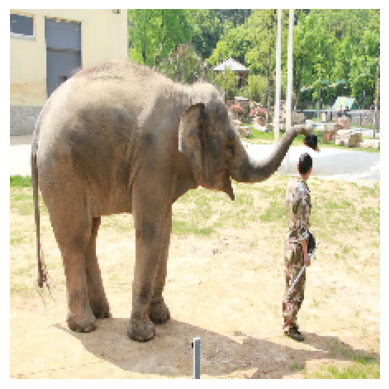

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input,decode_predictions
from keras.preprocessing import image

model =VGG16(weights="imagenet", include_top=True)
model.summary()

img_path= "./DATA/elephant.jpg"
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x = preprocess_input(x)
output = model.predict(x)

print("Predicted:", decode_predictions(output, top=5)[0])

plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
import tensorflow as tf
from keras.datasets import cifar10
from keras.layers import Input, Dense, Flatten
from keras.applications.vgg16 import preprocess_input, VGG16

(x_train, y_train), (x_test,y_test) = cifar10.load_data()
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

y_train =tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

inputs = Input(shape=(32,32,3))
resize_layer = tf.keras.layers.Lambda(lambda img: tf.image.resize(img,(224,224)))(inputs)

vgg_model = 

# ResNet 모델


In [5]:
import tensorflow as tf
from keras.datasets import cifar10
from keras.layers import Input,Dense,GlobalAveragePooling2D
from keras.applications import ResNet50
from keras.applications.regnet import preprocess_input, decode_predictions
from keras.preprocessing import image

(x_train, y_train), (x_test,y_test) = cifar10.load_data()
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

y_train =tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

inputs = Input(shape=(32,32,3))
resize_layer = tf.keras.layers.Lambda(lambda img: tf.image.resize(img,(224,224)))(inputs)

res_model = ResNet50(weights= "imagenet", include_top=False, input_tensor= inputs)
res_model.trainable =False

x = res_model.output
x= GlobalAveragePooling2D()(x)
x =Dense(1024, activation="relu")(x)
outs = Dense(10,activation="softmax")(x)
model =tf.keras.Model(inputs = inputs, outputs = outs)
model.summary()

94765736/94765736 [==============================] - 9s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                         